# Load library and data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from pytz import utc
import dateutil
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DA VEF 2022/Final project/Raw Data/Cohort.csv', header=None)
df.columns = ['order_id','customer_id','purchase_timestamp','value']
df.head()

,order_id,customer_id,purchase_timestamp,value
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02.0000000,7219
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06.0000000,25983
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31.0000000,21687
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35.0000000,2578
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51.0000000,21804


# Preprocessing

In [3]:
df_na = (df.isnull().sum() / len(df)) * 100 # percentage of missing entries

df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'miss_rate' :df_na})
missing_data.head(20)

,miss_rate


In [4]:
df['purchase_timestamp'] = pd.to_datetime(df['purchase_timestamp'])
df['datetime'] = df['purchase_timestamp'].apply(lambda x: dt.strftime(x, format = '%d/%m/%Y'))
df.head()

,order_id,customer_id,purchase_timestamp,value,datetime
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,7219,13/09/2017
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06,25983,26/04/2017
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,21687,14/01/2018
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35,2578,08/08/2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51,21804,04/02/2017


In [5]:
df['month'] = df['purchase_timestamp'].apply(lambda x: dt.strftime(x, format = '%m'))
df['year'] = df['purchase_timestamp'].apply(lambda x: dt.strftime(x, format = '%Y'))
df.head()

,order_id,customer_id,purchase_timestamp,value,datetime,month,year
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,7219,13/09/2017,09,2017
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06,25983,26/04/2017,04,2017
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,21687,14/01/2018,01,2018
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35,2578,08/08/2018,08,2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51,21804,04/02/2017,02,2017


In [6]:
df['cohort'] = df.apply(lambda x: int(x['year'])*100 + int(x['month']), axis=1)
df.head()

,order_id,customer_id,purchase_timestamp,value,datetime,month,year,cohort
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,7219,13/09/2017,09,2017,201709
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06,25983,26/04/2017,04,2017,201704
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,21687,14/01/2018,01,2018,201801
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35,2578,08/08/2018,08,2018,201808
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51,21804,04/02/2017,02,2017,201702


In [7]:
cohort_df = df.groupby('customer_id')['cohort'].min().reset_index()
cohort_df.columns = ['customer_id','first_cohort']
cohort_df.head()

,customer_id,first_cohort
0,0000366f3b9a7992bf8c76cfdf3221e2,201805
1,0000b849f77a49e4a4ce2b2a4ca5be3f,201805
2,0000f46a3911fa3c0805444483337064,201703
3,0000f6ccb0745a6a4b88665a16c9f078,201710
4,0004aac84e0df4da2b147fca70cf8255,201711


In [8]:
df = df.merge(cohort_df, on = 'customer_id', how = 'left')


In [9]:
headers = df['cohort'].value_counts().reset_index()
headers.columns = ['cohort','count']
headers = headers.sort_values(['cohort'])['cohort'].to_list()
headers

[201609,
 201610,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808]

In [10]:
df['cohort_distance'] = df.apply(lambda row: (headers.index(row['cohort']) - headers.index(row['first_cohort'])) if (row['first_cohort'] != 0 and row['cohort'] != 0)else np.nan, axis=1)

In [11]:
df

,order_id,customer_id,purchase_timestamp,value,datetime,month,year,cohort,first_cohort,cohort_distance
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,7219,13/09/2017,09,2017,201709,201709,0
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06,25983,26/04/2017,04,2017,201704,201704,0
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,21687,14/01/2018,01,2018,201801,201801,0
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35,2578,08/08/2018,08,2018,201808,201808,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51,21804,04/02/2017,02,2017,201702,201702,0
...,...,...,...,...,...,...,...,...,...,...
110192,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-23 13:57:06,34340,23/04/2018,04,2018,201804,201804,0
110193,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-14 10:26:46,38653,14/07/2018,07,2018,201807,201807,0
110194,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-23 17:07:56,11685,23/10/2017,10,2017,201710,201710,0
110195,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-14 23:02:59,6471,14/08/2017,08,2017,201708,201708,0


# Cohort Analysis

In [12]:
pivot = pd.pivot_table(df, index = 'first_cohort', columns = 'cohort_distance', values = 'customer_id', aggfunc=pd.Series.nunique)
pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
first_cohort,,,,,,,,,,,,,,,,,,,,
201609,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201610,262.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0,2.0
201612,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201701,717.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,NaN,1.0
201702,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN
201703,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN,NaN
201704,2256.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
201705,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN,NaN,NaN
201706,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0,9.0,11.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN


In [13]:
sns.set(rc={'figure.figsize':(25,20)})

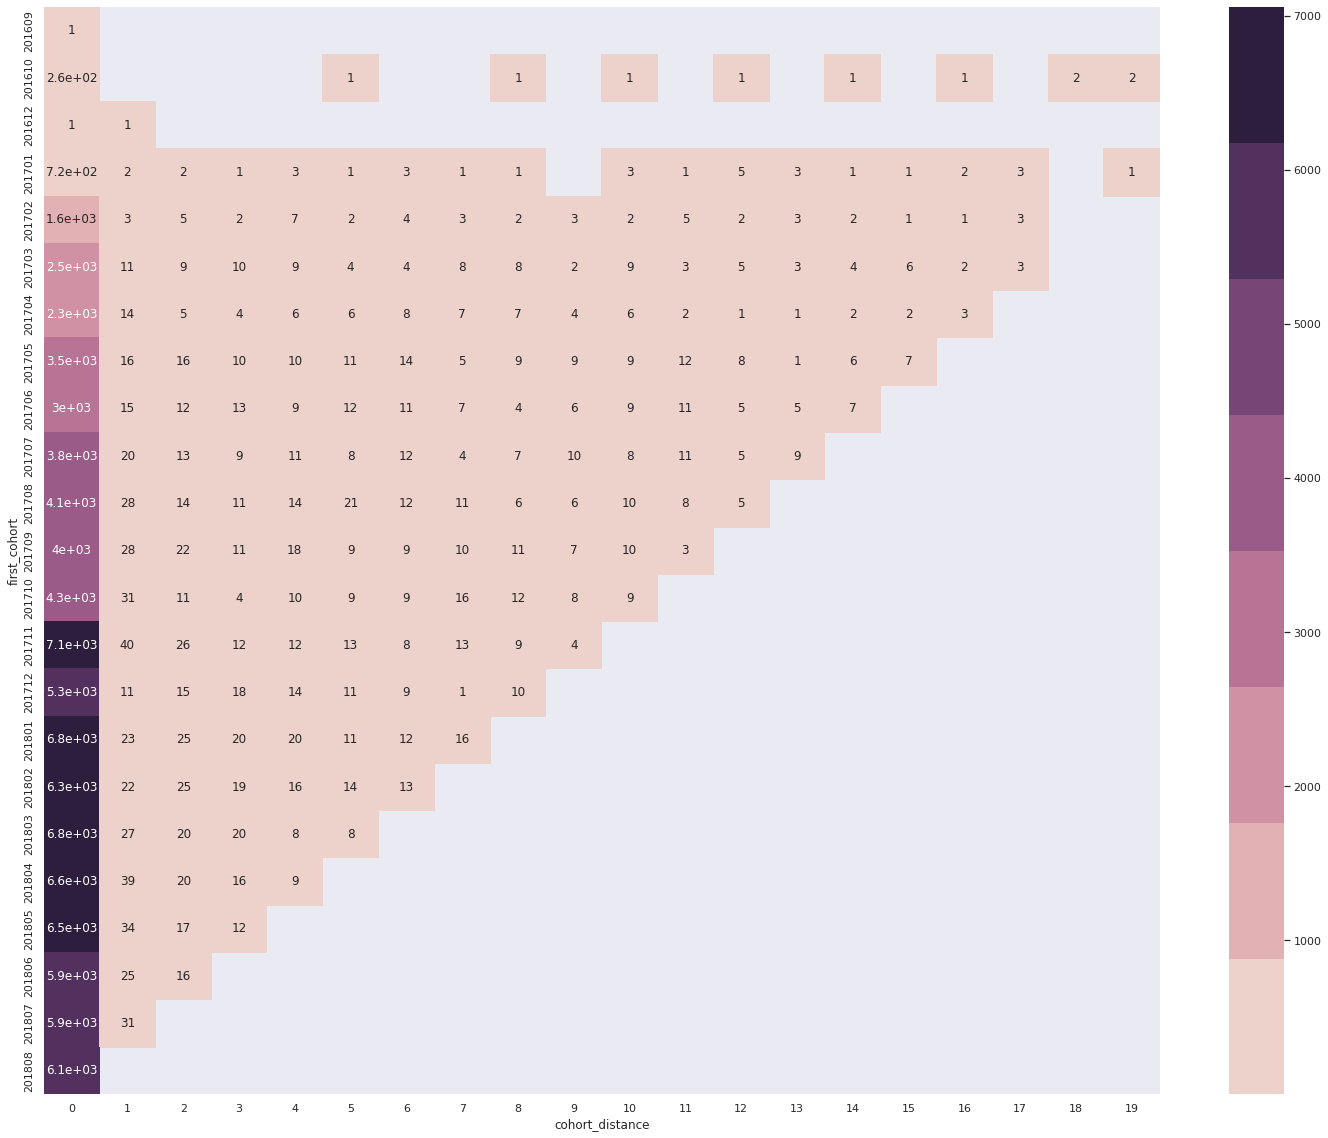

In [14]:
sns.heatmap(pivot, annot = True,cmap=sns.cubehelix_palette(8))

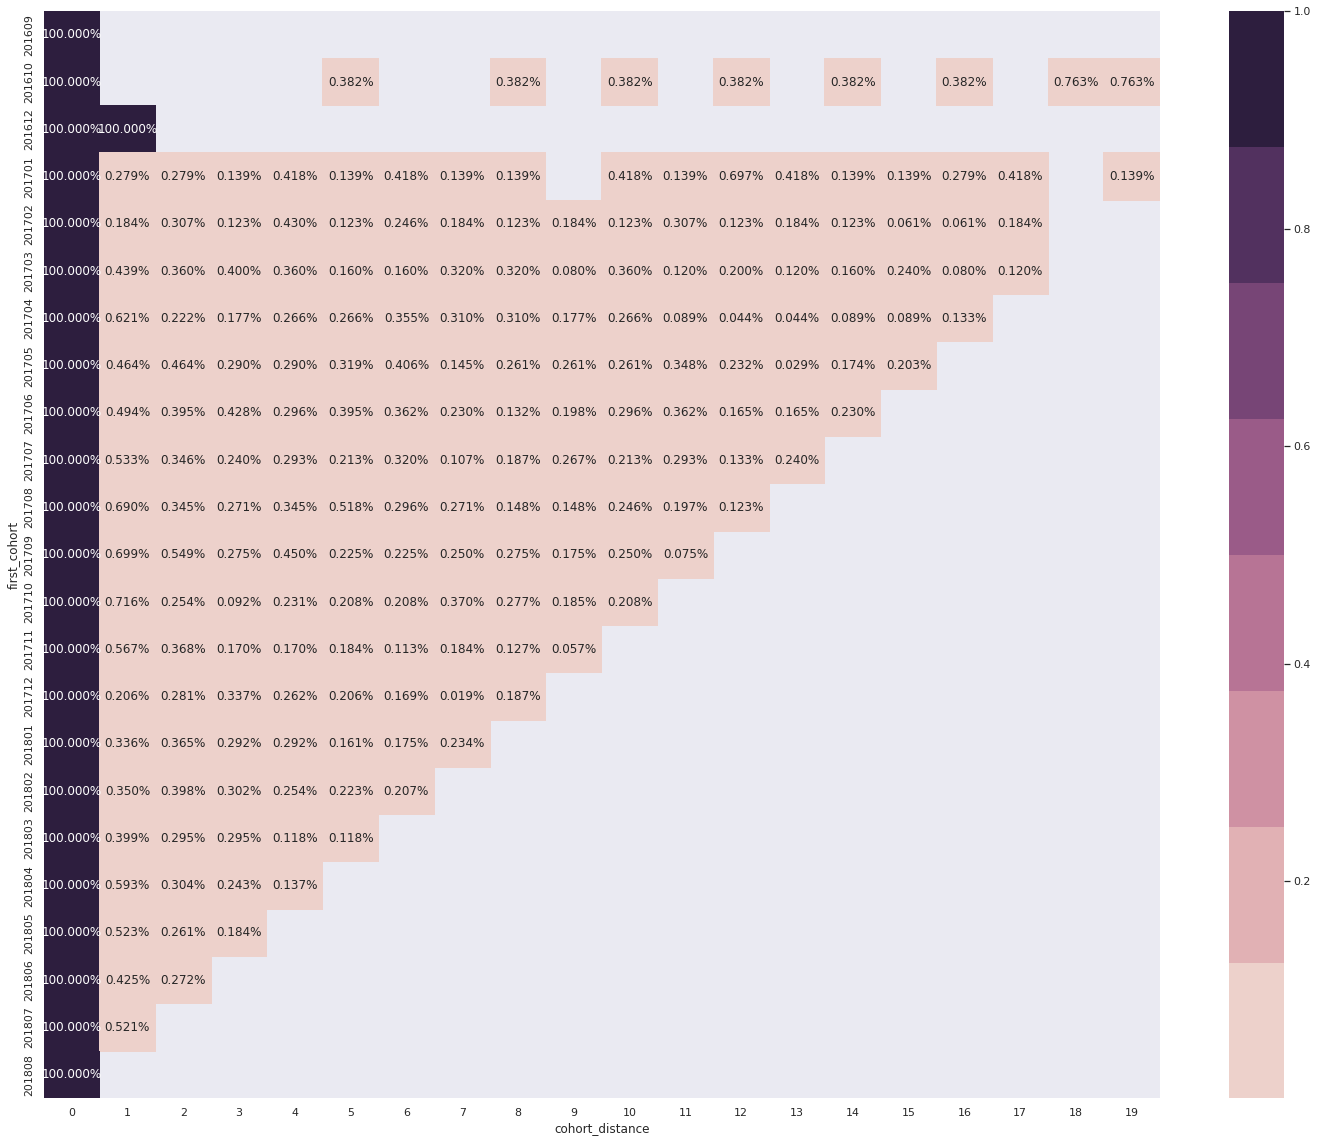

In [15]:
percentage = pivot.div(pivot[0], axis =0)
sns.heatmap(percentage, annot = True,cmap=sns.cubehelix_palette(8),fmt='.3%')

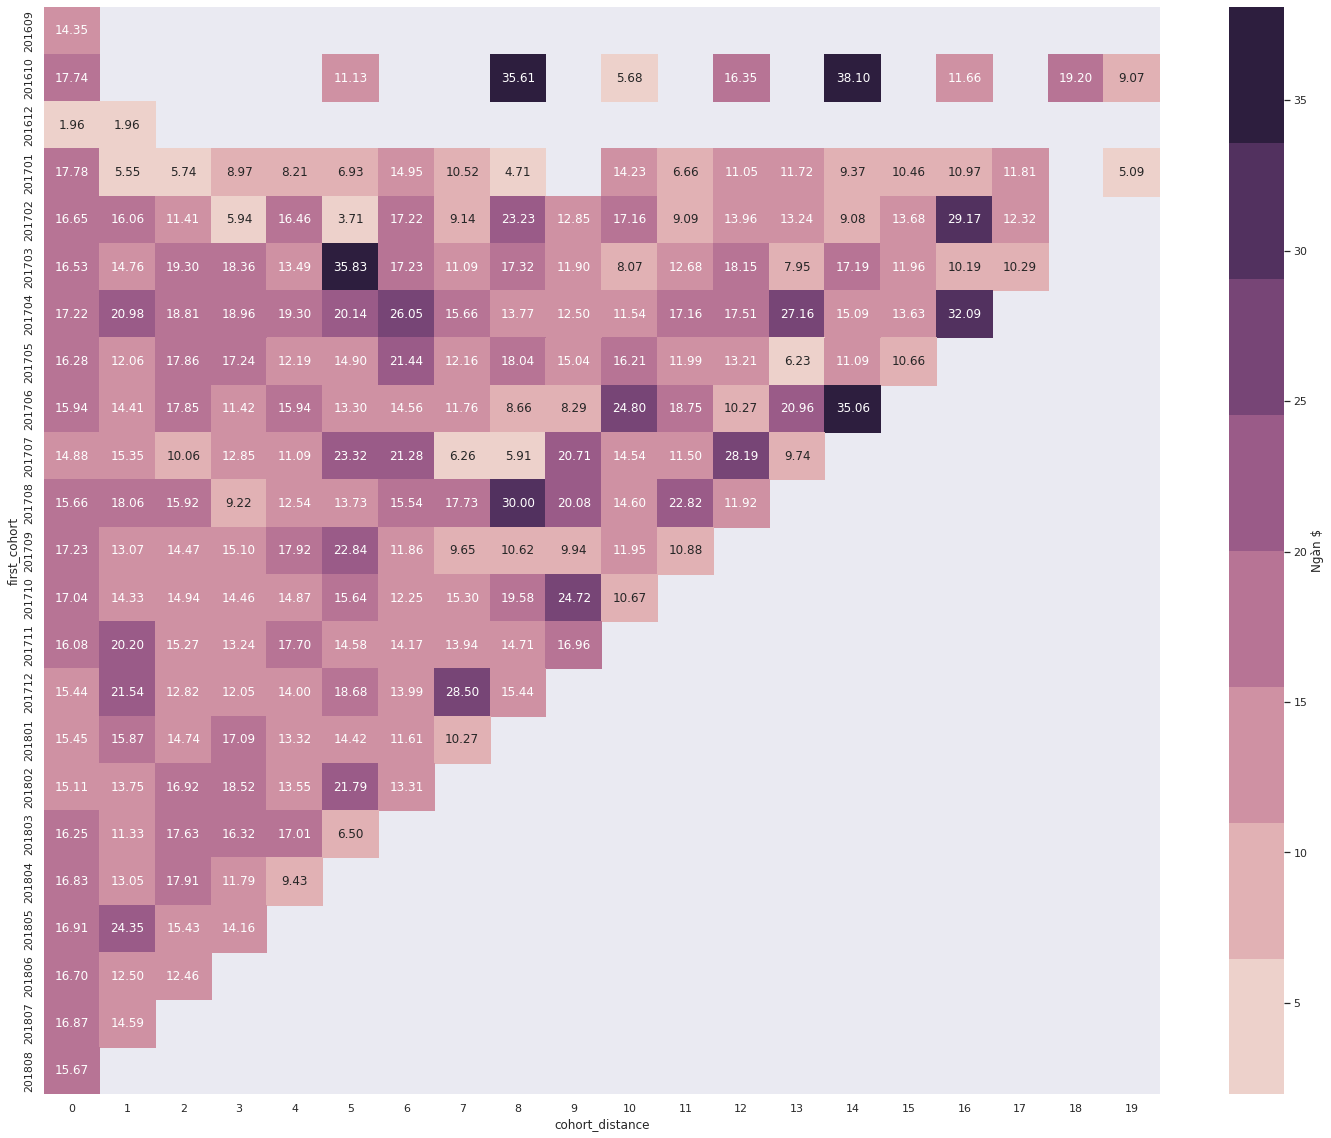

In [16]:
spending = pd.pivot_table(df, index = 'first_cohort', columns = 'cohort_distance', values = 'value', aggfunc='sum')
avg_spending = spending/(pivot*1000)
sns.heatmap(avg_spending, annot = True,cmap=sns.cubehelix_palette(8), fmt= '.2f',cbar_kws={'label': 'Ngàn $'})


# Rootcause Analysis
# WHY most customer only shop once?

##Shipment

In [17]:
delivery = pd.read_csv('/content/drive/MyDrive/DA VEF 2022/Final project/Raw Data/Shipment.csv')
delivery.columns = ['order_id','status','purchase_timestamp','approved_after', 'carrier_take_after','delivered_after','total_delivery_time','estimated_delivery_time']
delivery.head()

,order_id,status,purchase_timestamp,approved_after,carrier_take_after,delivered_after,total_delivery_time,estimated_delivery_time
0,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:06.0000000,0.0,8.0,8.0,16.0,19
1,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14 14:33:31.0000000,0.0,2.0,6.0,8.0,22
2,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08 10:00:35.0000000,0.0,2.0,4.0,6.0,12
3,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04 13:57:51.0000000,0.0,12.0,13.0,25.0,41
4,00048cc3ae777c65dbb7d2a0634bc1ea,delivered,2017-05-15 21:42:34.0000000,2.0,0.0,5.0,7.0,22


In [18]:
delivery.describe()

,approved_after,carrier_take_after,delivered_after,total_delivery_time,estimated_delivery_time
count,99280.000000,97643.000000,96474.000000,96475.000000,99440.000000
mean,0.518513,2.707158,9.282864,12.497393,24.404033
std,1.171329,3.568133,8.777234,9.555493,8.829573
min,0.000000,-171.000000,-16.000000,0.000000,2.000000
25%,0.000000,1.000000,4.000000,7.000000,19.000000
50%,0.000000,2.000000,7.000000,10.000000,24.000000
75%,1.000000,3.000000,12.000000,16.000000,29.000000
max,188.000000,126.000000,205.000000,210.000000,156.000000


([<matplotlib.patches.Wedge at 0x7f2a8117cc10>,
 [Text(-6.950426422820665e-05, 1.0999999978041626, 'approved'),
  Text(-0.021857651836669347, 1.0997828163124694, 'canceled'),
  Text(-0.04374139720342395, 1.0991299696444878, 'created'),
  Text(-0.05901544091710184, -1.0984157581414062, 'delivered'),
  Text(0.15062735260114102, 1.089638197131677, 'invoiced'),
  Text(0.12942901940006926, 1.0923589743930961, 'processing'),
  Text(0.08072590614909217, 1.097033877360407, 'shipped'),
  Text(0.021162580485684472, 1.0997964107902822, 'unavailable')],
 [Text(-3.791141685174907e-05, 0.5999999988022704, '0.0%'),
  Text(-0.011922355547274189, 0.5998815361704378, '0.6%'),
  Text(-0.023858943929140338, 0.5995254379879024, '0.0%'),
  Text(-0.03219024050023736, -0.5991358680771306, '97.0%'),
  Text(0.08216037414607691, 0.5943481075263692, '0.3%'),
  Text(0.07059764694549232, 0.5958321678507796, '0.3%'),
  Text(0.044032312444959365, 0.5983821149238582, '1.1%'),
  Text(0.011543225719464256, 0.59988895134

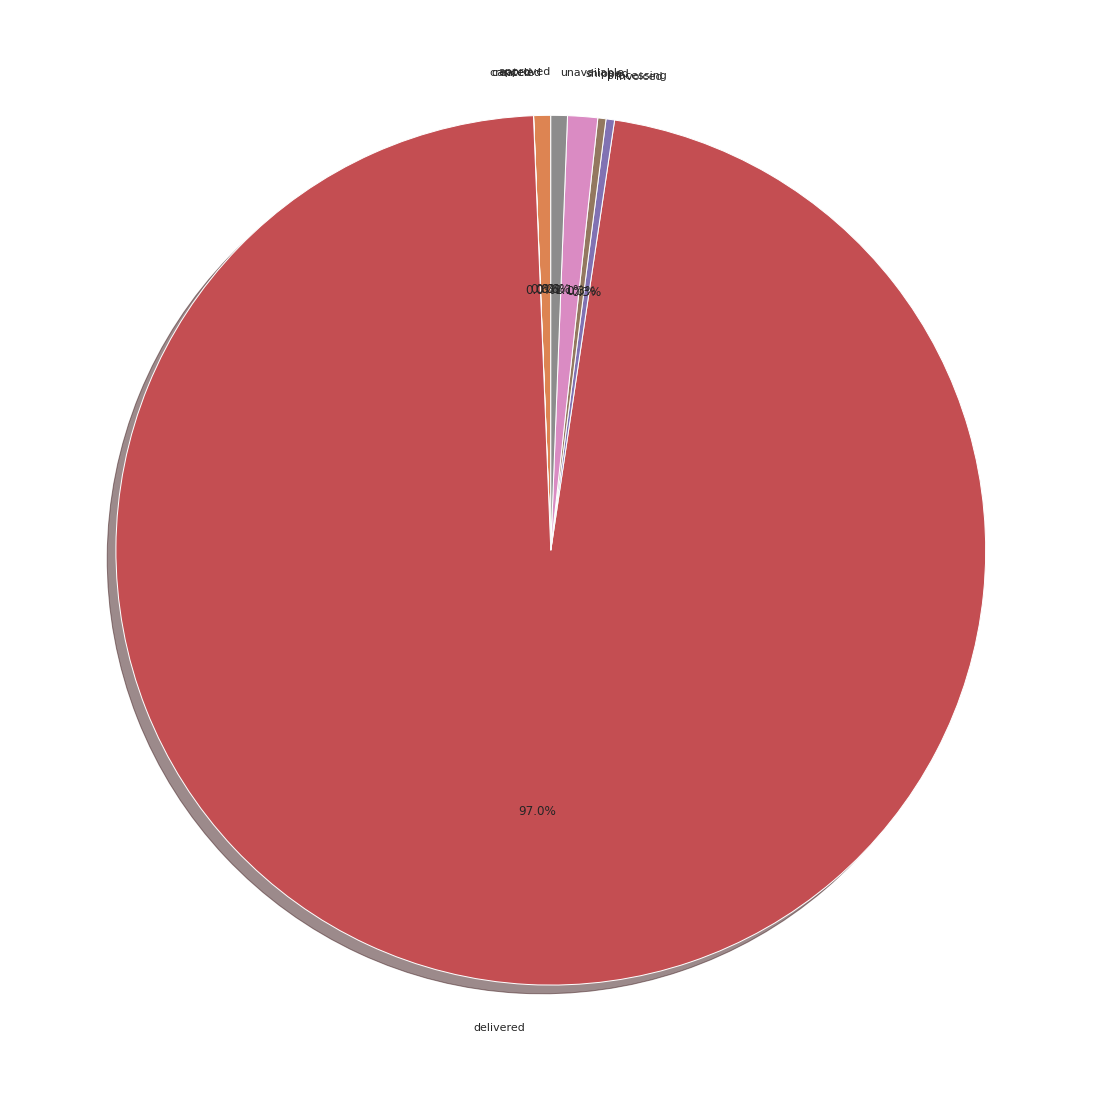

In [19]:
status = pd.DataFrame(delivery.groupby('status')['order_id'].count().reset_index())

fig1, ax1 = plt.subplots()
ax1.pie(status['order_id'], labels=status['status'], autopct='%1.1f%%',
        shadow=True, startangle=90)

Text(0.5, 1.0, 'Delivered_after')

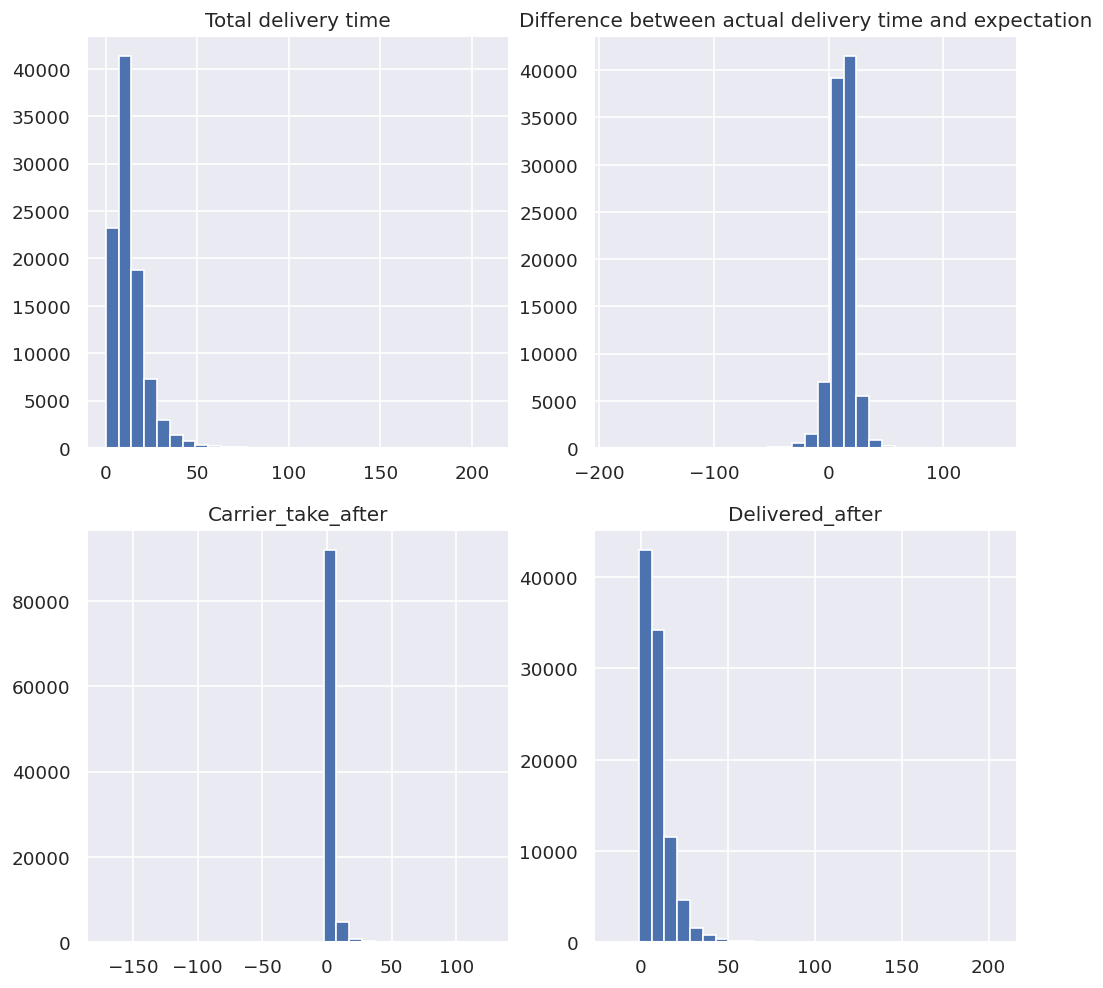

In [20]:
delivery['diff'] = delivery['estimated_delivery_time'] - delivery['total_delivery_time'] # <0 indicate that delivery take long time than expected 

fig, ax0 = plt.subplots(nrows=2, ncols=2,figsize=(10,10),dpi=120)
delivery['total_delivery_time'].hist(bins=30, ax = ax0[0,0])
delivery['diff'].hist(bins=30, ax = ax0[0,1])
delivery['carrier_take_after'].hist(bins=30, ax = ax0[1,0])
delivery['delivered_after'].hist(bins = 30, ax = ax0[1,1])

ax0[0,0].set_title('Total delivery time')
ax0[0,1].set_title('Difference between actual delivery time and expectation')
ax0[1,0].set_title('Carrier_take_after')
ax0[1,1].set_title('Delivered_after')

In [21]:
# Delivery time take longer than expected
real = delivery[(delivery['status'] == 'delivered') ]['total_delivery_time'].dropna()
expectation = delivery[(delivery['status'] == 'delivered')]['estimated_delivery_time'].dropna()

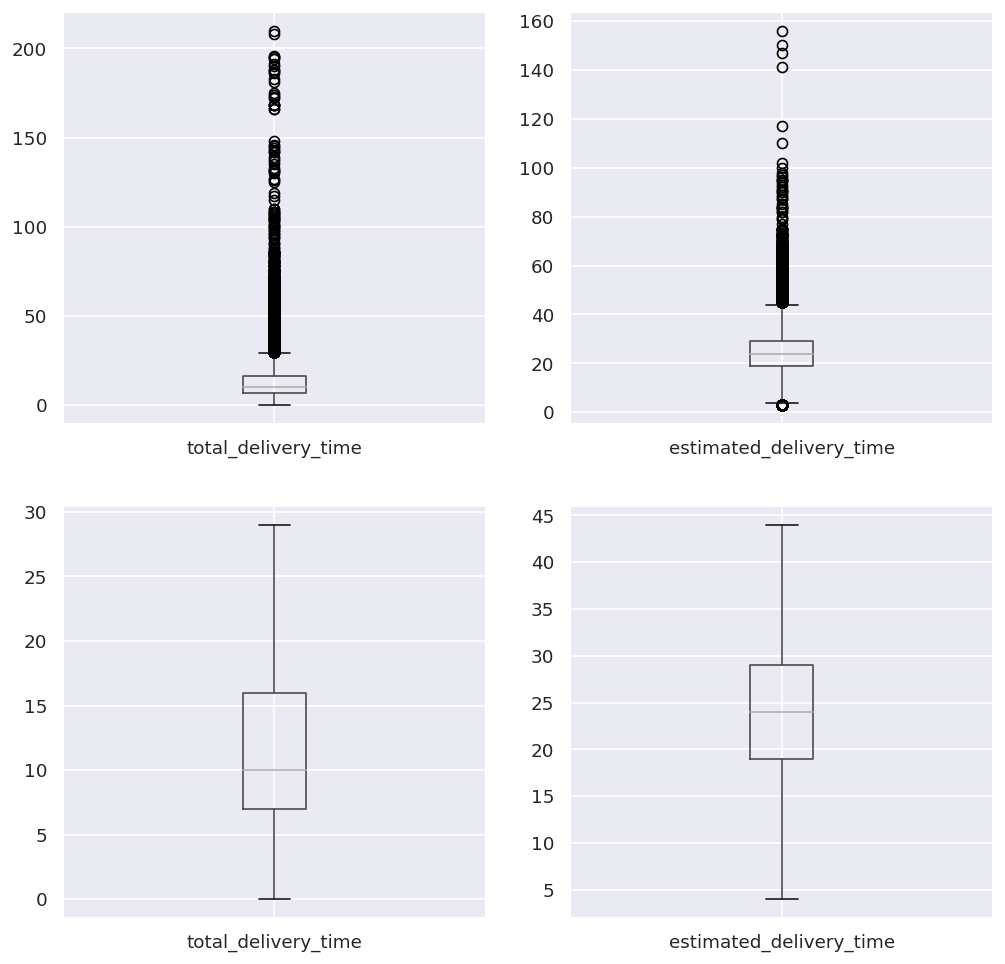

In [22]:
fig, ax2 = plt.subplots(nrows=2, ncols=2,figsize=(10,10),dpi=120)
pd.DataFrame(real).boxplot(ax = ax2[0,0])
pd.DataFrame(expectation).boxplot(ax = ax2[0,1])
pd.DataFrame(real).boxplot(ax = ax2[1,0], showfliers = False)
pd.DataFrame(expectation).boxplot(ax = ax2[1,1], showfliers = False)

###Delivery time always take longer than expectation?

+ Ho: real <= expectation
+ Ha: real > expectation

In [23]:
from scipy.stats import ttest_ind
ttest_ind(real, expectation, equal_var = False, alternative = 'less')

Ttest_indResult(statistic=-284.582619728147, pvalue=0.0)

Reject Ho, we can claim that delivery time may take longer than expectation.

## Rating

In [24]:
rating = pd.read_csv('/content/drive/MyDrive/DA VEF 2022/Final project/Raw Data/Rating.csv', header = None)
rating.columns = ['review_id','product_id', 'category','review_title','review_message','score']
rating.head()

,review_id,product_id,category,review_title,review_message,score
0,97ca439bc427b48bc1cd7177abe71365,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,NaN,"Perfeito, produto entregue antes do combinado.",5
1,7b07bacd811c4117b742569b04ce3580,e5f2d52b802189ee658865ca93d83a8f,pet_shop,NaN,NaN,4
2,0c5b33dea94867d1ac402749e5438e8b,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,NaN,Chegou antes do prazo previsto e o produto sur...,5
3,f4028d019cb58564807486a6aaf33817,7634da152a4610f1595efa32f14722fc,perfumery,NaN,NaN,4
4,940144190dcba6351888cafa43f3a3a5,ac6c3623068f30de03045865e4e10089,garden_tools,NaN,Gostei pois veio no prazo determinado .,5


In [25]:
rating.describe()

,score
count,110750.000000
mean,4.035395
std,1.385325
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<BarContainer object of 5 artists>

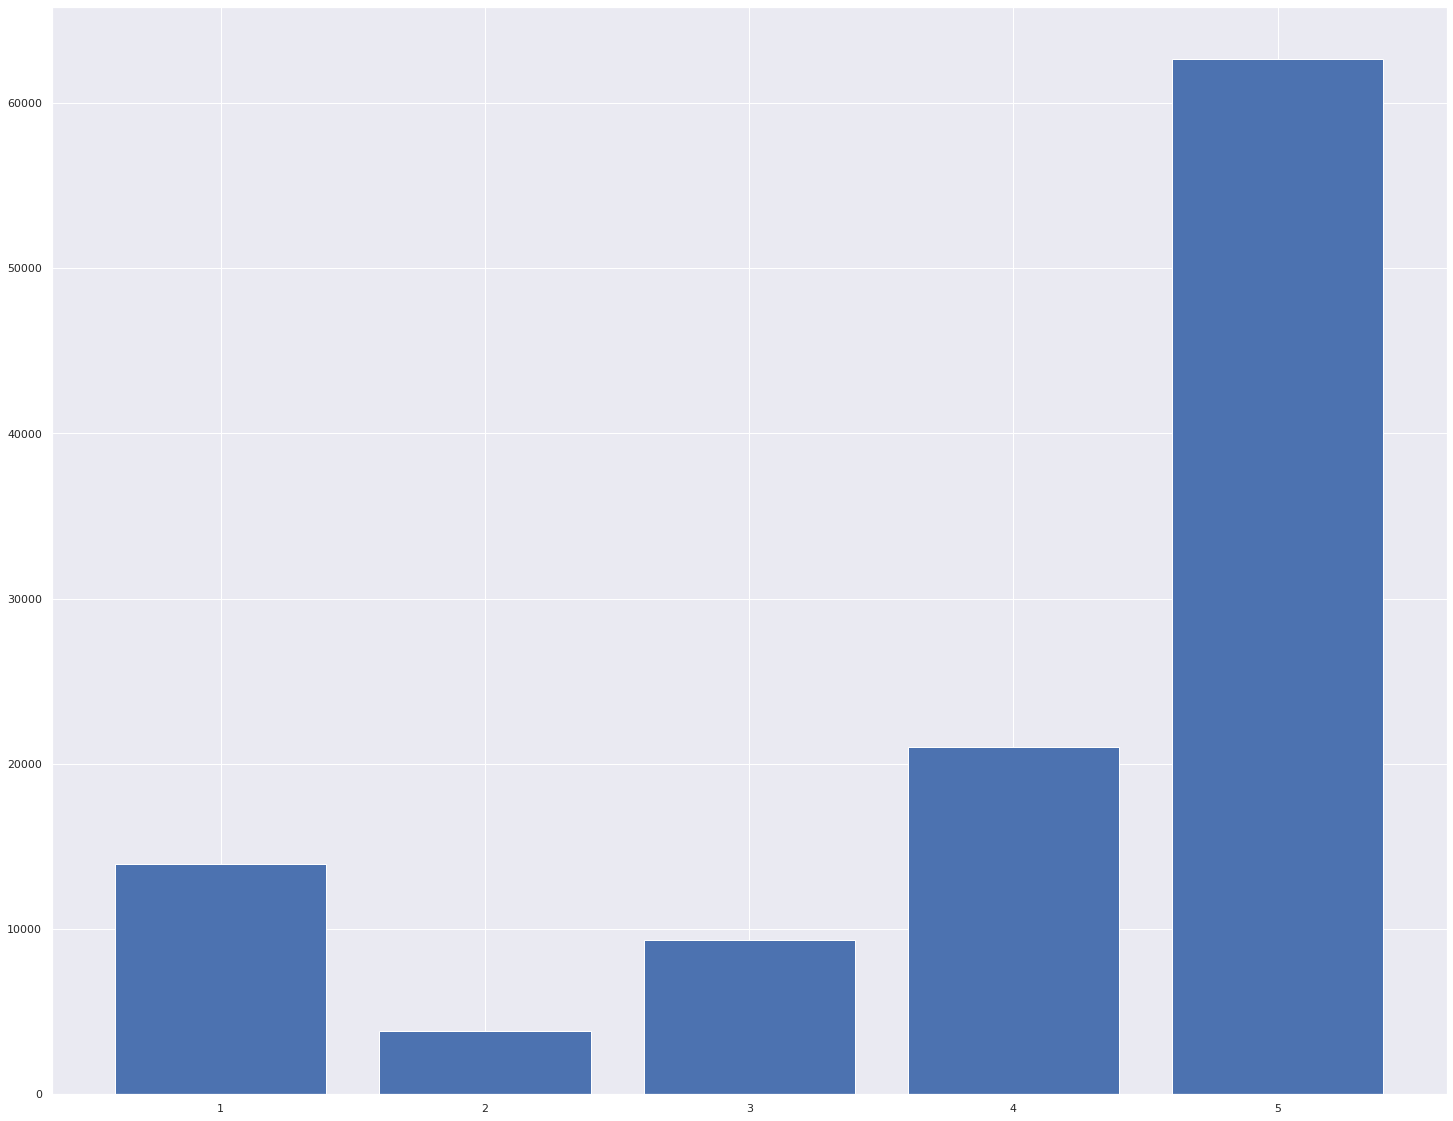

In [26]:
rating_score = rating.groupby('score')['review_id'].count().reset_index()
rating_score.columns = ['Rate','Count']
plt.bar(x=rating_score['Rate'], height = rating_score['Count'] )

In [27]:
bad_rating_category = rating[rating['score']<=3]['category'].reset_index()
bad_rating_category.describe(include = 'O')

,category
count,27067
unique,71
top,bed_bath_table
freq,3221


In [28]:
bad_rating_category.head()

,index,category
0,8,health_beauty
1,17,perfumery
2,19,cool_stuff
3,20,bed_bath_table
4,21,telephony


In [29]:
bad_rating_count= pd.DataFrame(bad_rating_category.groupby('category')['index'].count().reset_index())
bad_rating_count.columns = ['category','count']
bad_rating_count = bad_rating_count.sort_values(by = 'count', ascending= False).head(20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

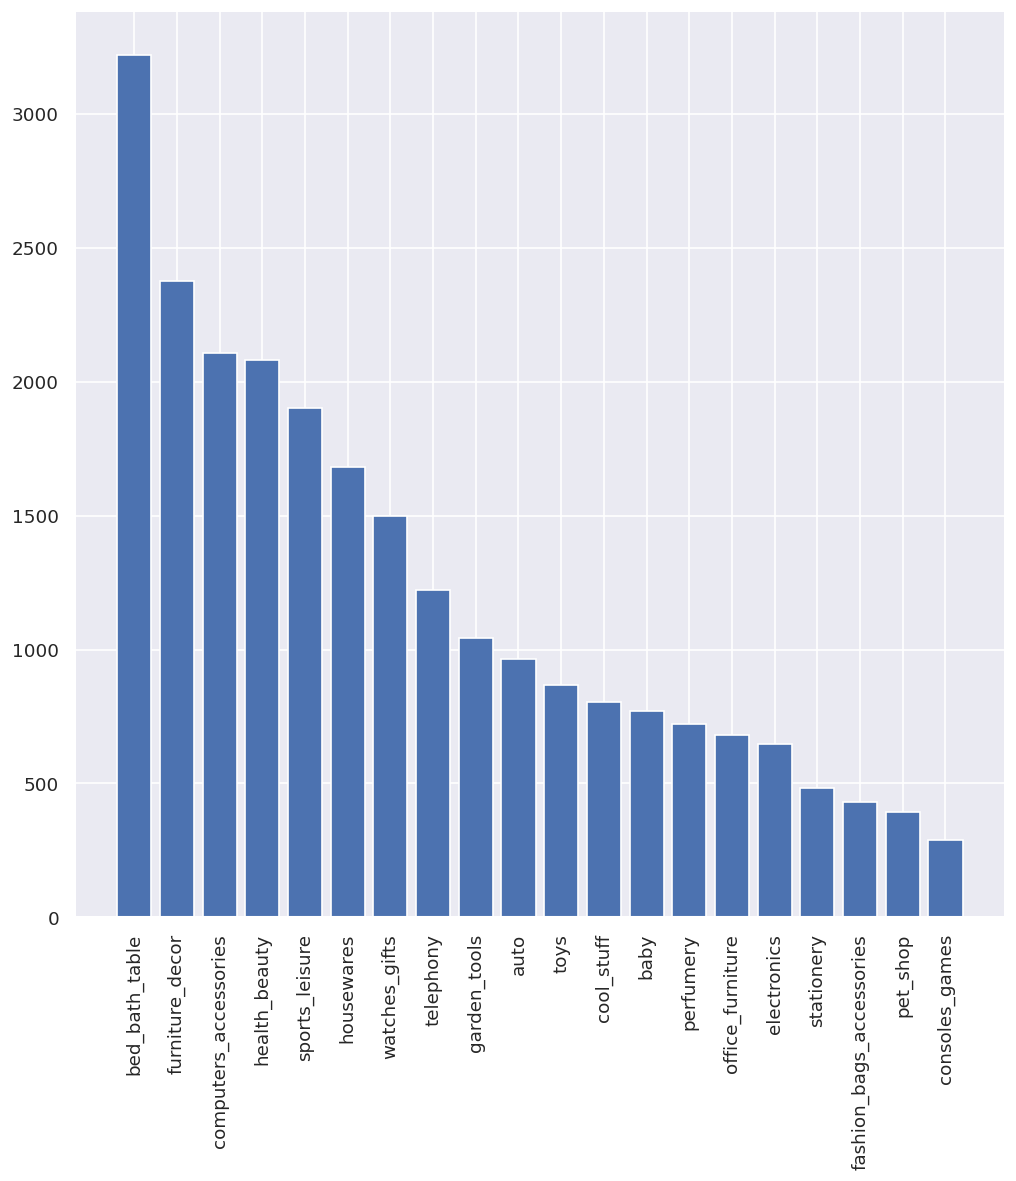

In [30]:
fig, ax3 = plt.subplots(nrows=1, ncols=1,figsize=(10,10),dpi=120)
ax3 = plt.bar(x=bad_rating_count['category'], height = bad_rating_count['count'])
plt.xticks(rotation=90)

### Less than 20% of customer is unsatisfied with their purchase?

In [31]:
from scipy.stats import chisquare

In [32]:
def satisfaction(x):
  satis = 'yes'
  if x <4:
     satis = 'no'
  return satis

In [33]:
rating['satisfied'] = rating['score'].apply(satisfaction)
real = rating.groupby('satisfied')['review_id'].count()
real

satisfied
no     27067
yes    83683
Name: review_id, dtype: int64

In [34]:
control = [real.sum()*0.2, real.sum()*0.8]
chisquare(real, control)

Power_divergenceResult(statistic=1364.3842550790068, pvalue=1.1531276790402767e-298)

## Payment

In [35]:
payment = pd.read_csv('/content/drive/MyDrive/DA VEF 2022/Final project/Raw Data/Payment.csv', header = None)
payment.columns = ['payment_id','type','value']
payment.head()

,payment_id,type,value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,9933
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,2439
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,6571
3,ba78997921bbcdc1373bb41e913ab953,credit_card,10778
4,42fdf880ba16b47b59251dd489d4441a,credit_card,12845


In [36]:
payment = payment[payment["type"].str.contains("not_defined") == False]

In [37]:
by_type = payment.groupby('type').agg({'payment_id':'count','value':'sum'}).reset_index()
by_type.columns = ['type','count','sum_value']
by_type

,type,count,sum_value
0,boleto,19784,286936127
1,credit_card,76795,1254208419
2,debit_card,1529,21798979
3,voucher,5775,37943687


([<matplotlib.patches.Wedge at 0x7f2a7ed82650>,
 [Text(0.9089233252332396, 0.6195630628490943, 'boleto'),
  Text(-1.022582101039335, -0.4053712454454307, 'credit_card'),
  Text(1.0150715561286372, -0.42382748369895396, 'debit_card'),
  Text(1.0832670258427635, -0.19113490189333238, 'voucher')],
 [Text(0.4957763592181306, 0.33794348882677866, '19.0%'),
  Text(-0.5577720551123645, -0.22111158842478038, '73.9%'),
  Text(0.5536753942519839, -0.23117862747215667, '1.5%'),
  Text(0.5908729231869618, -0.10425540103272674, '5.6%')])

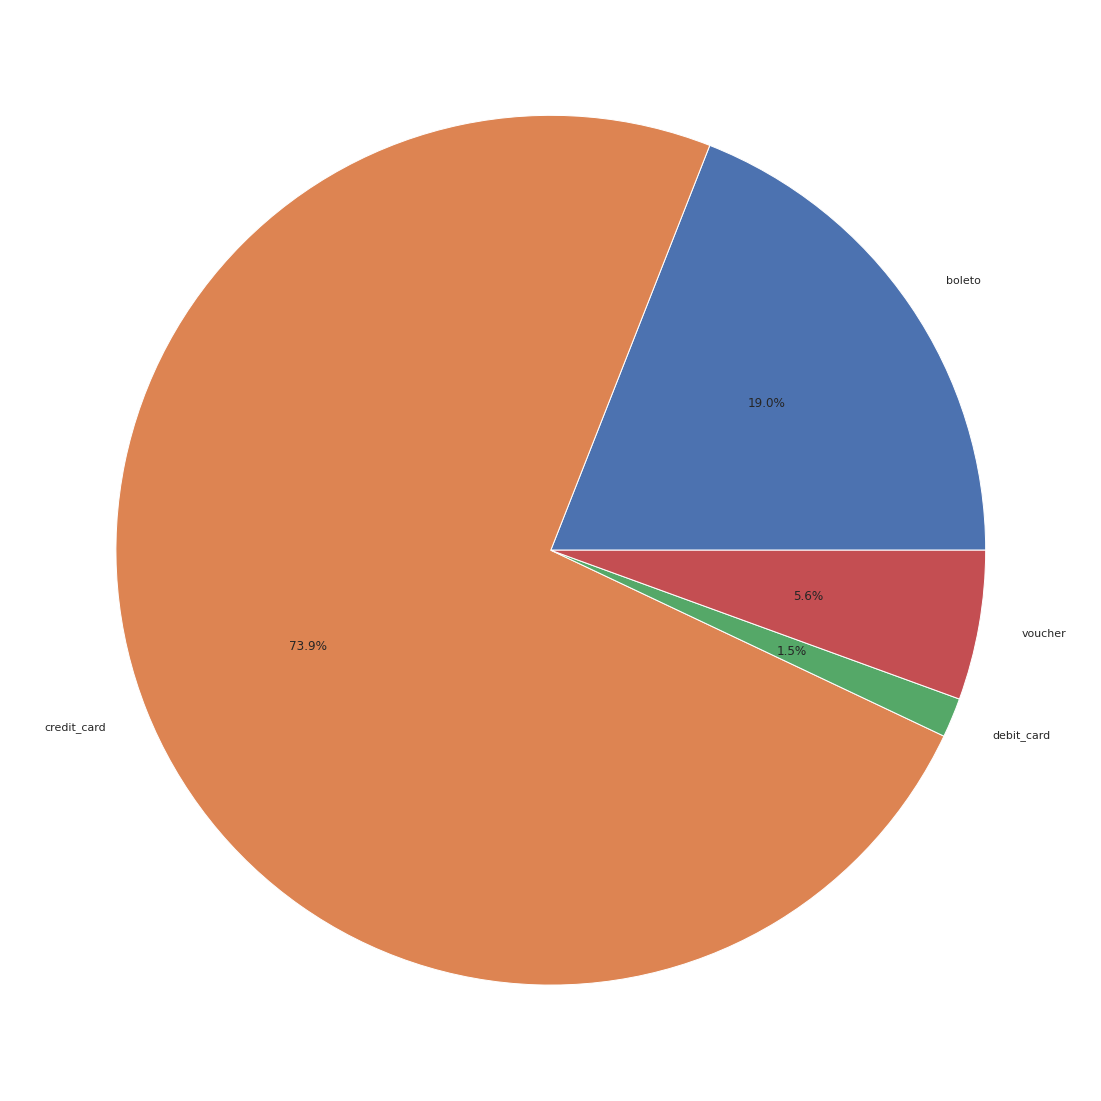

In [38]:
plt.pie(by_type['count'],labels=by_type['type'],autopct='%1.1f%%')

<BarContainer object of 4 artists>

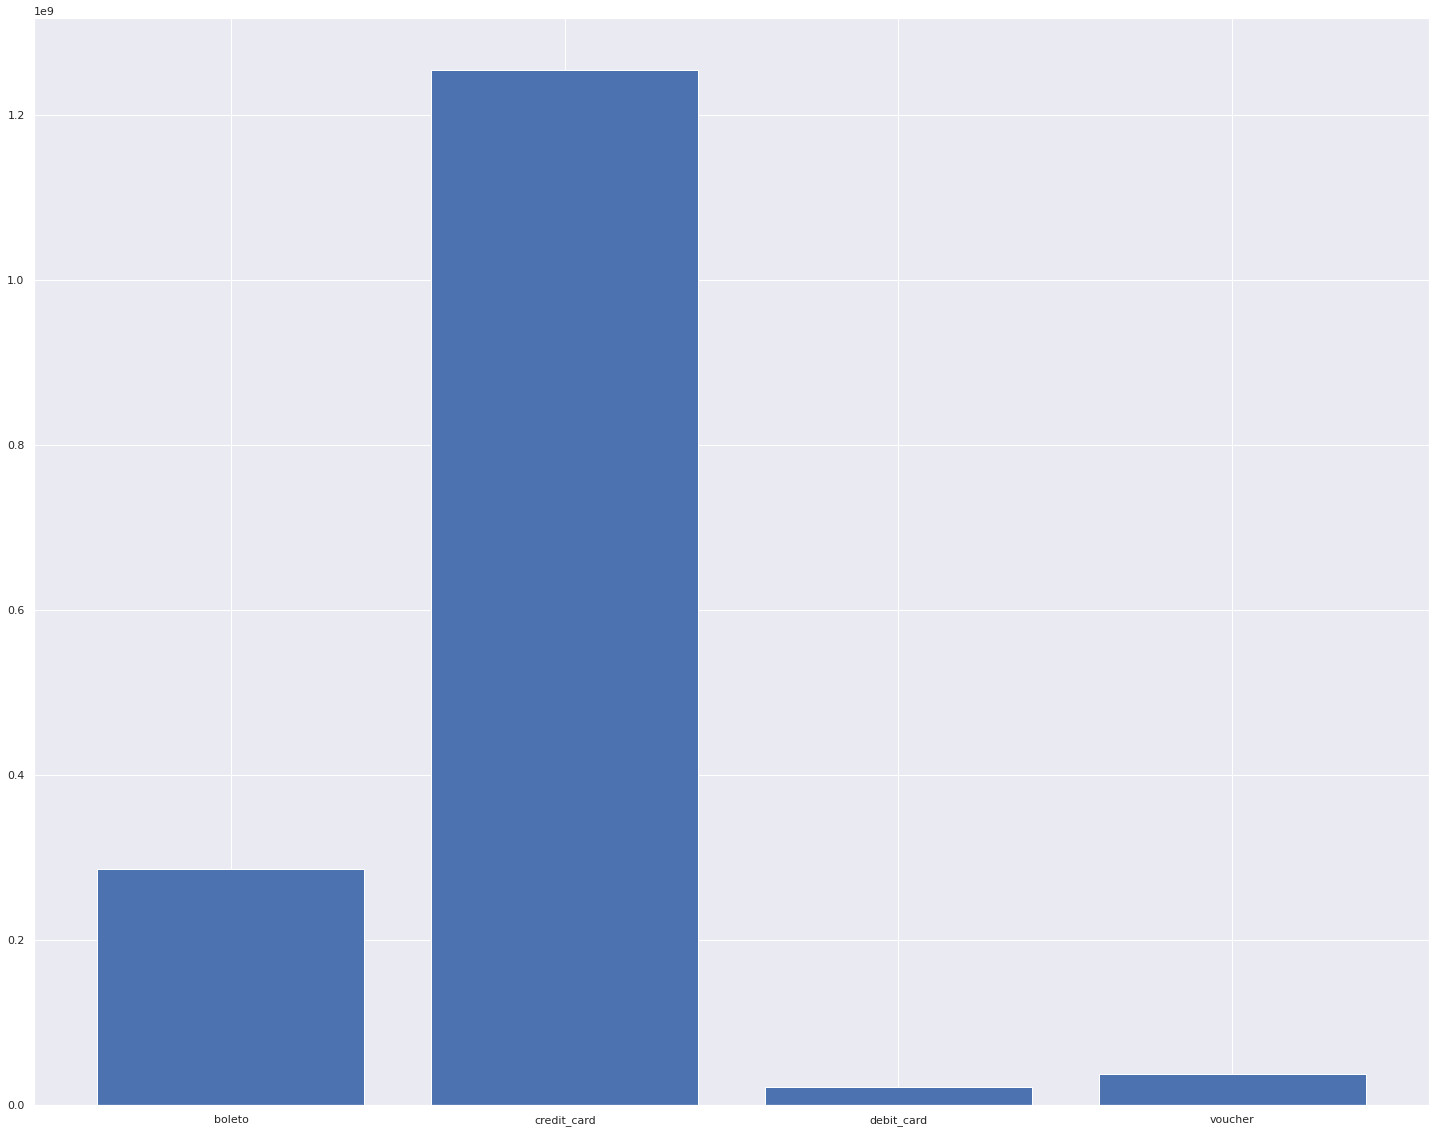

In [39]:
plt.bar(x = by_type['type'], height = by_type['sum_value'])

In [40]:
from scipy.stats import ttest_ind

In [41]:
boleto = payment[payment['type'] ==  'boleto']['value']
credit_card = payment[payment['type'] ==  'credit_card']['value']
debit_card = payment[payment['type'] ==  'debit_card']['value']
voucher = payment[payment['type'] ==  'voucher']['value']

Text(0.5, 1.0, 'Voucher')

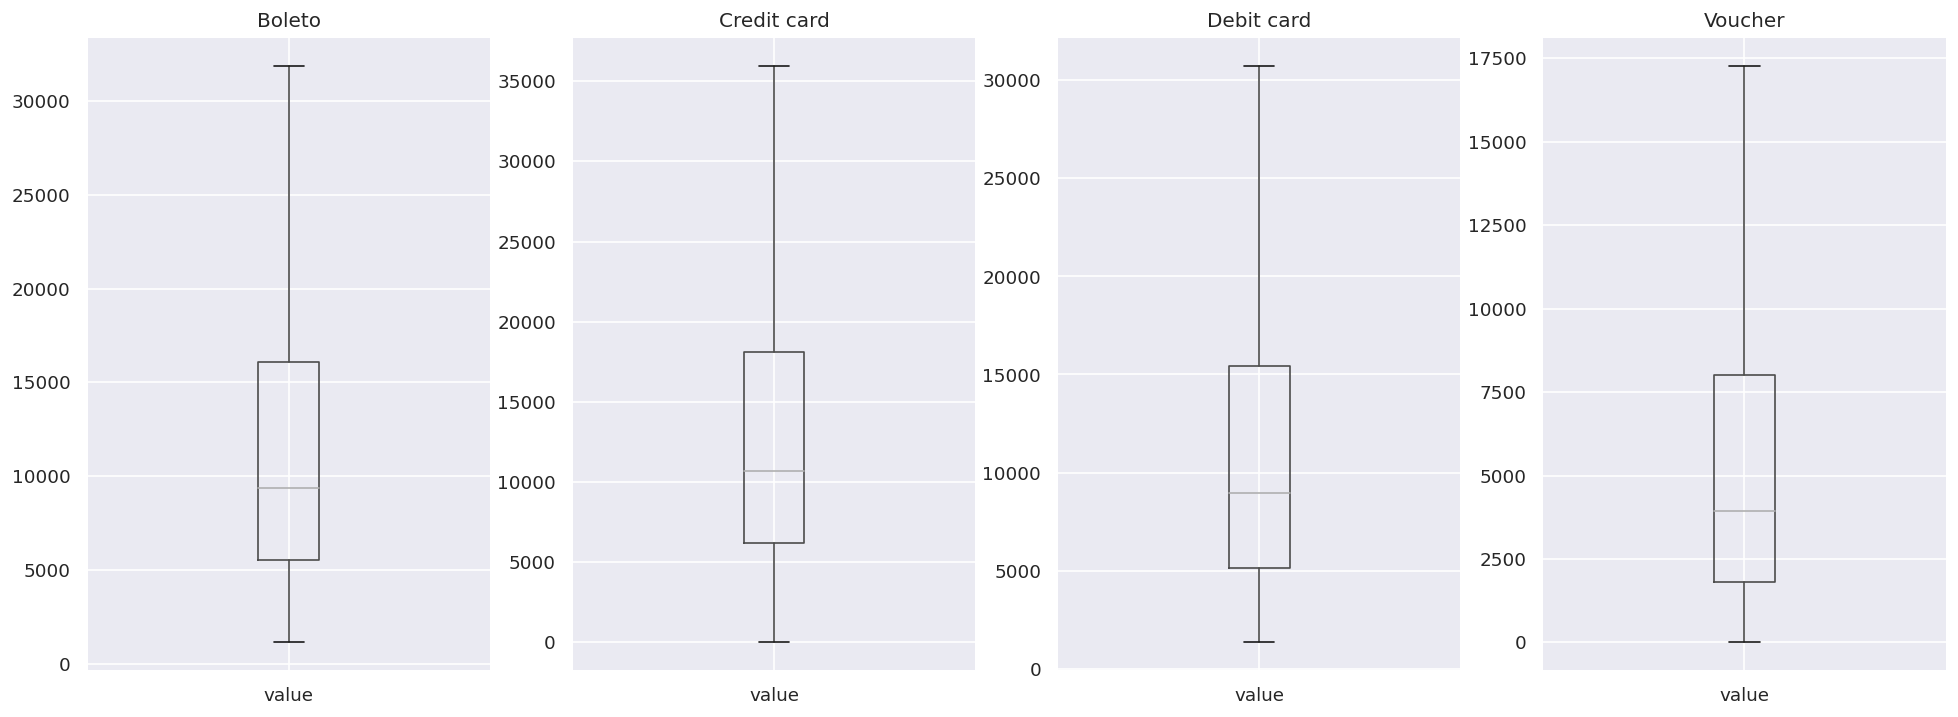

In [42]:
fig, ax4 = plt.subplots(nrows=1, ncols=4,figsize=(20,7),dpi=120)
pd.DataFrame(boleto).boxplot(ax = ax4[0], showfliers = False)
pd.DataFrame(credit_card).boxplot(ax = ax4[1], showfliers = False)
pd.DataFrame(debit_card).boxplot(ax = ax4[2], showfliers = False)
pd.DataFrame(voucher).boxplot(ax = ax4[3], showfliers = False)

ax4[0].set_title('Boleto')
ax4[1].set_title('Credit card')
ax4[2].set_title('Debit card')
ax4[3].set_title('Voucher')

### Value of a single purchase paid by voucher is lower than others?

+ Ho: voucher >= boleto, credit_card, debit_card

In [43]:
ttest_ind(voucher,boleto, equal_var = False, alternative ='greater')

Ttest_indResult(statistic=-36.92209549728959, pvalue=1.0)

Fail to reject Ho

In [44]:
ttest_ind(voucher,credit_card, equal_var = False, alternative ='greater')

Ttest_indResult(statistic=-56.80306498567032, pvalue=1.0)

Fail to reject Ho

In [45]:
ttest_ind(voucher,debit_card, equal_var = False, alternative ='greater')

Ttest_indResult(statistic=-11.885860999458496, pvalue=1.0)

Fail to reject Ho

#Conclusion

We can claim that late delivery time bare a responsibility to the fact that most customers only purchased once. Besides, if our objectives is more than 80% customers satisfy with their purchase, the data shows that target is almost fail. Finally, their may exist groups of customer who not interest in our platform since the percentage usage of voucher is not too much but the hypothesis claim that value of a single voucher used for a purchase is higher than others payment method.    